In [3]:
def count_swing_grapher(mlb_id, metric, balls, strikes):
        
    from pybaseball import statcast_batter
    
    import matplotlib.pyplot as plt
    
    import pandas as pd
    
    import matplotlib.patches as patches
    
    from datetime import datetime
    
    today = datetime.today().strftime('%Y-%m-%d')
    
    #gets pitch data for chosen player
    data = statcast_batter('2015-3-30', today, player_id = mlb_id)
    
    #removes all pitches that are intentional balls or pitchouts
    necessary = data.loc[(data['description']!= 'intent_ball') | (data['pitch_type']!='PO')]
    
    #gets the mean of every available stat (will be used to generate strikezone)
    avgs =necessary.describe()
    
    #gets the average top measurement of the strikezone for the specific player
    top_sz = avgs['sz_top'][1]
    
    #gets the average bottom measurement of the strikezone for the specific player
    bot_sz = avgs['sz_bot'][1]
    
    fixed = necessary.loc[(necessary['plate_x']<= 2.2)&(necessary['plate_x']>= -2.2)]
    
    new_data = fixed.loc[(fixed['plate_z']<= (top_sz+0.75))&(fixed['plate_z']>= 0)]
    
    fig, ax = plt.subplots()
    
    #generates strikezone using the measurements we got above
    strikezone = patches.Rectangle((-0.70833,bot_sz), width= 17/12, height = (top_sz-bot_sz), fill=False)
    
    count_data = new_data.loc[(new_data.balls == balls) & (new_data.strikes == strikes)]
    
    if metric == 'Take Rate':
        
        graph = ax.hexbin(count_data['plate_x'],count_data['plate_z'], C = 
                          count_data.description.isin(['called_strike', 'ball', 'blocked_ball']),
                         gridsize=(6,6), mincnt=3, vmax = 1,vmin =0, cmap = 'Reds')
    
    elif metric == 'Swing Rate':
        
        graph = ax.hexbin(count_data['plate_x'],count_data['plate_z'], C = 
                          count_data.description.isin(['swinging_strike', 'hit_into_play_no_out','foul', 
                        'hit_into_play', 'foul_bunt','hit_into_play_score', 
                        'swinging_strike_blocked','foul_tip']),
                         gridsize=(6,6), mincnt=3, vmax = 1,vmin =0, cmap = 'Reds')
        
    else:
        
        msg1=print('Function arguments are incorrect, the first argument should be an mlbam id for a player. ')
        
        msg2=print('The second argument can include: Swing Rate, Swing and Miss Rate, and Take Rate ')
        
        msg3=print('The third argument can either be soft or hard')
        
        graph = msg1+msg2+msg3
        
    ax.add_patch(strikezone)
    
    ax.axis('equal')
    
    ax.set_title(data.player_name[0]+ ' ' +metric + ' in '+ str(balls) + '-'+str(strikes)+' count')
    
    cbar = fig.colorbar(graph)
    
    cbar.set_label(metric)
    
    return graph

Gathering Player Data
Gathering Player Data


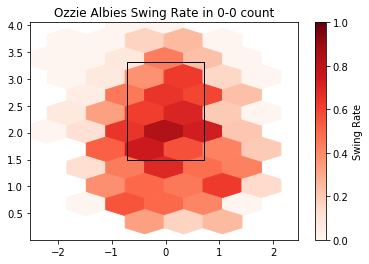

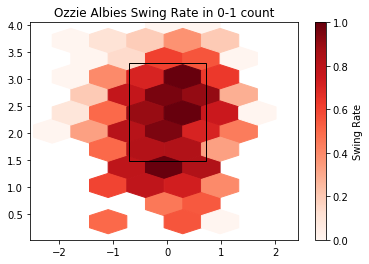

In [40]:

count_swing_grapher(645277,'Swing Rate',0,0)
count_swing_grapher(645277, 'Swing Rate',0,1)